In [1]:
import numpy as np
import lightkurve as lk
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
parent_folder = os.getcwd()
parent_folder

'/home/arthurbarreto/Documents/Insper/ic/credenciais_drive'

In [3]:
df_folder = os.path.join(parent_folder, "filtered_df.csv")
df_folder

'/home/arthurbarreto/Documents/Insper/ic/credenciais_drive/filtered_df.csv'

In [4]:
df = pd.read_csv(df_folder)
df.head()

,hostname,disposition,sy_snum
0,BD+20 594,CONFIRMED,1
1,EPIC 201111557,CANDIDATE,1
2,EPIC 201126503,CANDIDATE,1
3,EPIC 201127519,CANDIDATE,1
4,EPIC 201147085,CANDIDATE,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hostname     1558 non-null   object
 1   disposition  1558 non-null   object
 2   sy_snum      1558 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 36.6+ KB


<Axes: ylabel='disposition'>

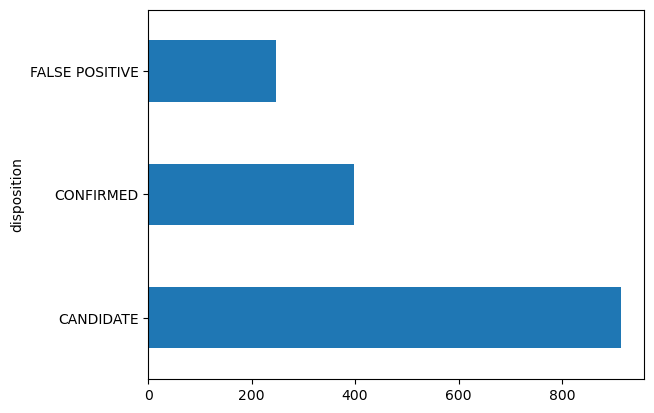

In [6]:
df["disposition"].value_counts().plot(kind="barh")

## teste de baixar a imagem como matrix

In [7]:
tpf = lk.search_targetpixelfile('EPIC 201111557', author="K2", exptime="long").download(quality_bitmask=0)

/home/arthurbarreto/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/arthurbarreto/anaconda3/lib/python3.11/site-packages/astropy/io/fits/fitsrec.py:700: UserWarning: Field 12 has a repeat count of 0 in its format code, indicating an empty field.
  warnings.warn(


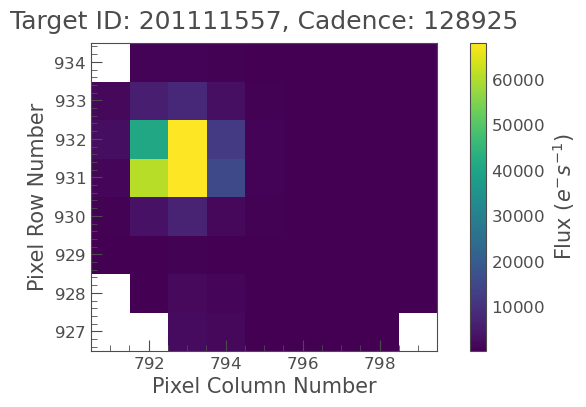

In [8]:
tpf.plot();

In [9]:
matrix_img = tpf.flux

In [11]:
matrix_img = np.array(matrix_img)

In [12]:
matrix_img.shape

(306, 8, 9)

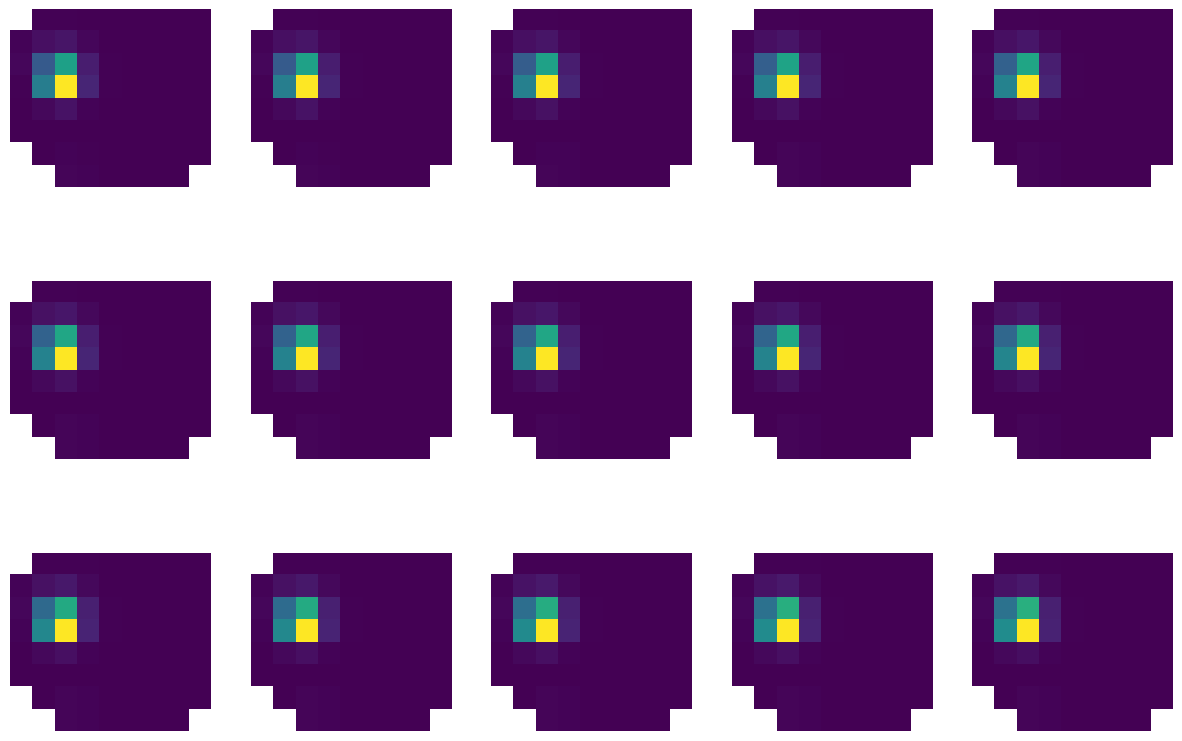

In [12]:
# plot the first 15 imgs from the matrix
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
for i in range(15):
    ax = axs[i//5, i%5]
    ax.imshow(matrix_img[i], origin="lower")
    ax.axis("off")

In [13]:
# get the num of imgs
num_imgs = matrix_img.shape[0]
num_imgs

306

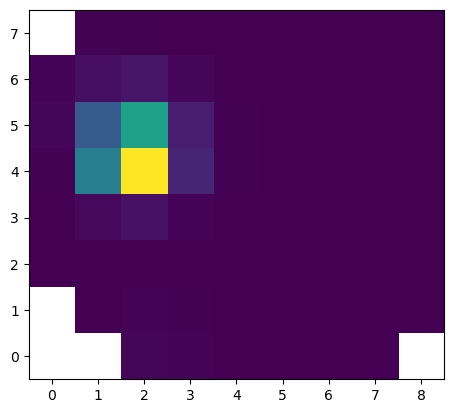

In [14]:
plt.imshow(matrix_img[1], origin="lower")

In [15]:
np.savez_compressed("matrix_img.npz", matrix_img=matrix_img)

In [16]:
# reading the .npy file
matrix_img = np.load("matrix_img.npz")

loaded = matrix_img["matrix_img"]

In [17]:
loaded

array([[[        nan,         nan,  2228.0605 , ...,   260.6711 ,
           263.60666,         nan],
        [        nan,   474.07355,  1865.4438 , ...,   272.75827,
           256.28998,   258.81458],
        [  332.90652,   460.76398,   625.06854, ...,   276.82086,
           262.67505,   265.3246 ],
        ...,
        [ 2738.819  , 40887.543  , 81384.12   , ...,   279.13284,
           261.8499 ,   257.0554 ],
        [ 1594.0275 ,  6045.824  ,  8195.078  , ...,   260.22925,
           255.99432,   255.73264],
        [        nan,   980.5532 ,  1011.7686 , ...,   260.264  ,
           257.46442,   256.5565 ]],

       [[        nan,         nan,  2224.167  , ...,   258.9422 ,
           261.53235,         nan],
        [        nan,   468.80124,  1878.979  , ...,   271.71942,
           254.9469 ,   258.68494],
        [  332.71982,   462.23944,   625.3237 , ...,   272.3169 ,
           262.00314,   261.82968],
        ...,
        [ 2729.5393 , 41265.918  , 81503.234  , ...,  

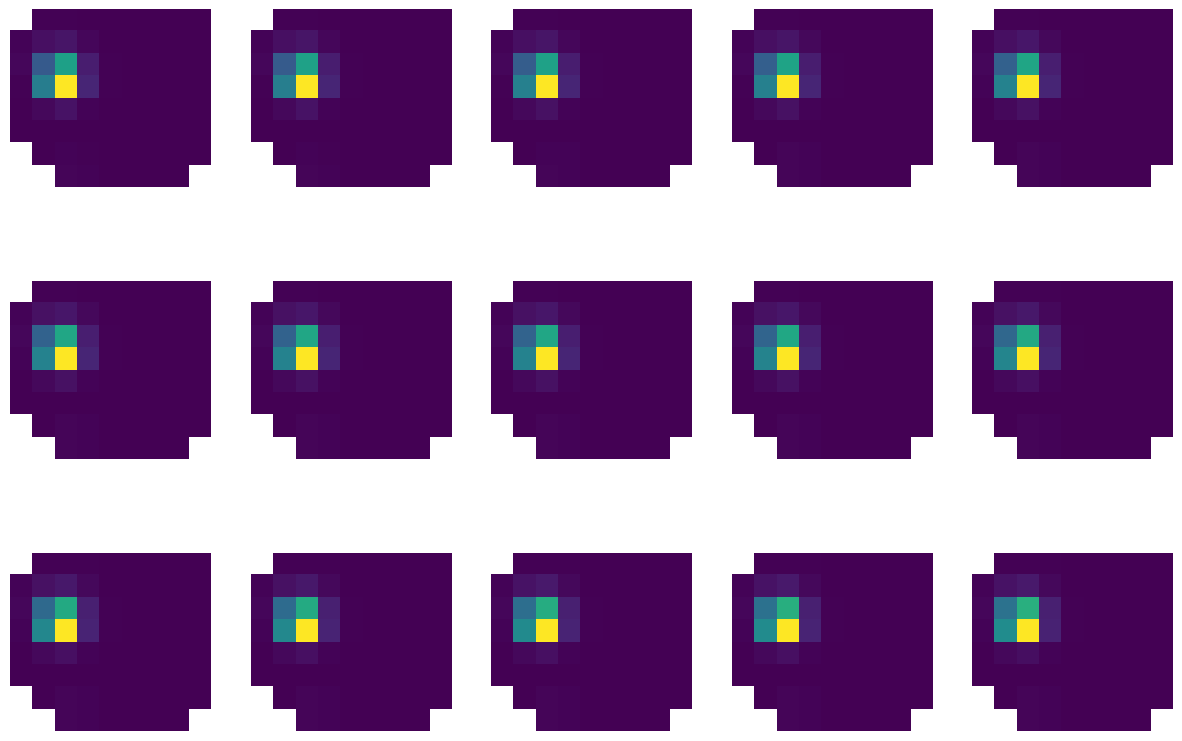

In [18]:
# plot the first 15 imgs from the matrix
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
for i in range(15):
    ax = axs[i//5, i%5]
    ax.imshow(loaded[i], origin="lower")
    ax.axis("off")


## loop for saving the files

In [29]:
for id, folder in zip(df.hostname, df.disposition):
    try:
        tpf = lk.search_targetpixelfile(id, author="K2", exptime="long").download(quality_bitmask=0)
        matrix_img = tpf.flux
        matrix_img = np.array(matrix_img)
        # saving on the tight folder, give by folder variable. file name like /folder/id.npz
        np.savez_compressed(f"{folder}/{id}.npz", matrix_img=matrix_img)
    except Exception as e:
        with open("failed.csv", "a") as f:
            f.write(f"{id},{folder}\n")

/home/arthurbarreto/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/arthurbarreto/anaconda3/lib/python3.11/site-packages/astropy/io/fits/fitsrec.py:700: UserWarning: Field 12 has a repeat count of 0 in its format code, indicating an empty field.
  warnings.warn(
/home/arthurbarreto/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/arthurbarreto/anaconda3/lib/python3.11/site-packages/astropy/io/fits/fitsrec.py:700: UserWarning: Field 12 has a repeat count of 0 in its format code, indi

In [21]:
# separate the df with idx, after the 1298 row

df_1 = df.iloc[:1320]
df_2 = df.iloc[1320:]

df_2.head()

,hostname,disposition,sy_snum
1320,K2-223,CONFIRMED,1
1321,K2-224,CONFIRMED,1
1322,K2-225,CONFIRMED,1
1323,K2-226,CONFIRMED,1
1324,K2-227,CONFIRMED,1


In [22]:
for id, folder in zip(df_2.hostname, df_2.disposition):
    try:
        tpf = lk.search_targetpixelfile(id, author="K2", exptime="long").download(quality_bitmask=0)
        matrix_img = tpf.flux
        matrix_img = np.array(matrix_img)
        # saving on the tight folder, give by folder variable. file name like /folder/id.npz
        np.savez_compressed(f"{folder}/{id}.npz", matrix_img=matrix_img)
    except Exception as e:
        with open("failed.csv", "a") as f:
            f.write(f"{id},{folder}\n")

/home/arthurbarreto/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/arthurbarreto/anaconda3/lib/python3.11/site-packages/astropy/io/fits/fitsrec.py:700: UserWarning: Field 12 has a repeat count of 0 in its format code, indicating an empty field.
  warnings.warn(
/home/arthurbarreto/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/arthurbarreto/anaconda3/lib/python3.11/site-packages/astropy/io/fits/fitsrec.py:700: UserWarning: Field 12 has a repeat count of 0 in its format code, indi